# Pipeline_GridSearchCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [2]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

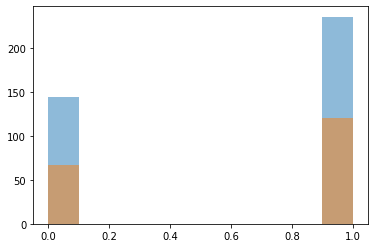

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [5]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(probability=True))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 100,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [7]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [8]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

In [9]:
len(results.mean_test_score)

72

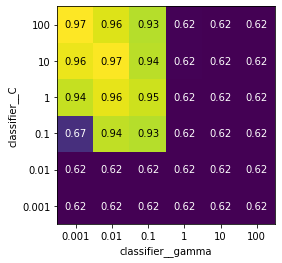

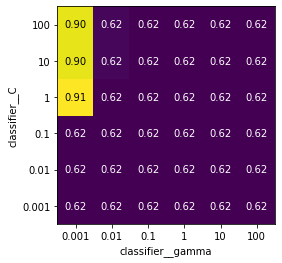

In [10]:
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LinearSVC(C=1))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

{'classifier__C': 0.01,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [12]:
from sklearn.linear_model import LogisticRegression

pipe_3 = Pipeline([('preprocessing', StandardScaler()),  ('classifier', LogisticRegression(C=1, solver='newton-cg'))])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_3 = GridSearchCV(pipe_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 1,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [13]:
from sklearn.tree import DecisionTreeClassifier

pipe_4 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', DecisionTreeClassifier())])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [5,9,10,11,20,30],
            'classifier__min_samples_split': [2,3,5,10,20,30,40],
            'classifier__max_leaf_nodes': [3,4,10,14,15,16,20,30,40]
}


grid_4 = GridSearchCV(pipe_4, param_grid_4, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__max_depth': 5,
 'classifier__max_leaf_nodes': 15,
 'classifier__min_samples_split': 5,
 'preprocessing': None}

In [33]:
from sklearn.ensemble import RandomForestClassifier

pipe_5 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16))
                  ])

param_grid_5 = {'classifier__n_estimators': [10, 50, 100],
              'classifier__max_leaf_nodes': [10, 20],
              'classifier__max_depth': [10, 20]
             }

grid_5 = GridSearchCV(pipe_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_depth': 20,
 'classifier__max_leaf_nodes': 20,
 'classifier__n_estimators': 100}

In [57]:
from sklearn.ensemble import BaggingClassifier

pipe_6 = Pipeline([('preprocessing', StandardScaler()), 
                   ('classifier', BaggingClassifier(
                                    DecisionTreeClassifier(random_state=42), n_estimators=500,
                                    max_samples=100, bootstrap=True, random_state=42))
                  ])

param_grid_6 = {'classifier__n_estimators': [10,50,100],
              'classifier__max_samples': [10,20]
             }

grid_6 = GridSearchCV(pipe_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_


{'classifier__max_samples': 20, 'classifier__n_estimators': 100}

In [58]:
from sklearn.ensemble import VotingClassifier
v1 = VotingClassifier(
    estimators=[('SVM rbf', grid_1.best_estimator_),
                ('SVM linear', grid_2.best_estimator_),
                ('LR', grid_3.best_estimator_),
                ('RF', grid_5.best_estimator_),
                ('Bagging', grid_6.best_estimator_)
],
    voting='hard')
v1.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM rbf',
                              Pipeline(memory=None,
                                       steps=[('preprocessing',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('classifier',
                                               SVC(C=100, break_ties=False,
                                                   cache_size=200,
                                                   class_weight=None, coef0=0.0,
                                                   decision_function_shape='ovr',
                                                   degree=3, gamma=0.001,
                                                   kernel='rbf', max_iter=-1,
                                                   probability=True,
                         

In [59]:
from sklearn.ensemble import VotingClassifier
v2 = VotingClassifier(
    estimators=[('SVM rbf', grid_1.best_estimator_),
                ('LR', grid_3.best_estimator_),
                ('RF', grid_5.best_estimator_),
                ('Bagging', grid_6.best_estimator_)
],
    voting='soft')
v2.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM rbf',
                              Pipeline(memory=None,
                                       steps=[('preprocessing',
                                               StandardScaler(copy=True,
                                                              with_mean=True,
                                                              with_std=True)),
                                              ('classifier',
                                               SVC(C=100, break_ties=False,
                                                   cache_size=200,
                                                   class_weight=None, coef0=0.0,
                                                   decision_function_shape='ovr',
                                                   degree=3, gamma=0.001,
                                                   kernel='rbf', max_iter=-1,
                                                   probability=True,
                         

In [60]:
from sklearn import  metrics




models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM linear', grid_2.best_estimator_))
models.append(('LR', grid_3.best_estimator_))
models.append(('DT', grid_4.best_estimator_))
models.append(('RF', grid_5.best_estimator_))
models.append(('Bagging', grid_6.best_estimator_))

models.append(('Vo hard', v1))
models.append(('Vo soft', v2))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
roc_auc_score = []
for name, model in models:
    print(name)
    print("precision_score: {}".format(metrics.precision_score(y_test , model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test , model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test , model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test , model.predict(X_test)) ))
    if (name == 'SVM linear'):
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.decision_function(X_test)) ))
    elif (name == 'Vo hard'):
        pass
    else:
        print("roc_auc_score: {}".format( metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]) ))
    precision_score.append(metrics.precision_score(y_test , model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test , model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test , model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test , model.predict(X_test)))
    if (name == 'SVM linear'):
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.decision_function(X_test)))
    elif (name == 'Vo hard'):
        roc_auc_score.append(0)
    else:
        roc_auc_score.append(metrics.roc_auc_score(y_test , model.predict_proba(X_test)[:,1]))

SVM rbf
precision_score: 0.9834710743801653
recall_score: 0.9834710743801653
f1_score: 0.9834710743801653
accuracy_score: 0.9787234042553191
roc_auc_score: 0.9974096459849513
SVM linear
precision_score: 0.9917355371900827
recall_score: 0.9917355371900827
f1_score: 0.9917355371900827
accuracy_score: 0.9893617021276596
roc_auc_score: 0.9983964475144936
LR
precision_score: 0.9915966386554622
recall_score: 0.9752066115702479
f1_score: 0.9833333333333334
accuracy_score: 0.9787234042553191
roc_auc_score: 0.9972862957937585
DT
precision_score: 0.9827586206896551
recall_score: 0.9421487603305785
f1_score: 0.9620253164556961
accuracy_score: 0.9521276595744681
roc_auc_score: 0.9589860614283953
RF
precision_score: 0.952
recall_score: 0.9834710743801653
f1_score: 0.967479674796748
accuracy_score: 0.9574468085106383
roc_auc_score: 0.9960527938818305
Bagging
precision_score: 0.9586776859504132
recall_score: 0.9586776859504132
f1_score: 0.9586776859504132
accuracy_score: 0.9468085106382979
roc_auc_sc

In [61]:
import pandas as pd
d = {'precision_score': precision_score,
     'recall_score': recall_score,
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score,
     'roc_auc_score' : roc_auc_score
    }
df = pd.DataFrame(data=d)
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'Linear SVM ', 'LogReg', 'DT', "RF", "Vo hard", "Vo soft", "Bagging"])
df

,Method,precision_score,recall_score,f1_score,accuracy_score,roc_auc_score
0,SVM rbf,0.983471,0.983471,0.983471,0.978723,0.997410
1,Linear SVM,0.991736,0.991736,0.991736,0.989362,0.998396
2,LogReg,0.991597,0.975207,0.983333,0.978723,0.997286
3,DT,0.982759,0.942149,0.962025,0.952128,0.958986
4,RF,0.952000,0.983471,0.967480,0.957447,0.996053
5,Vo hard,0.958678,0.958678,0.958678,0.946809,0.994079
6,Vo soft,0.991736,0.991736,0.991736,0.989362,0.000000
7,Bagging,0.991597,0.975207,0.983333,0.978723,0.998396


SVM rbf
SVM linear
LR
DT
RF
Bagging
Vo hard
Vo soft


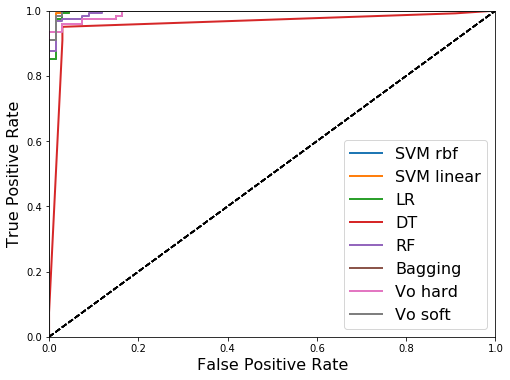

In [64]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
plt.figure(figsize=(8, 6))
for name, model in models:
    print(name)
    if (name == 'SVM linear'):
        y_scores = model.decision_function(X_test)
    elif (name == 'Vo hard'):
        pass
    else:
        y_scores = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plot_roc_curve(fpr, tpr, name)
plt.legend(loc="lower right", fontsize=16)
plt.show()

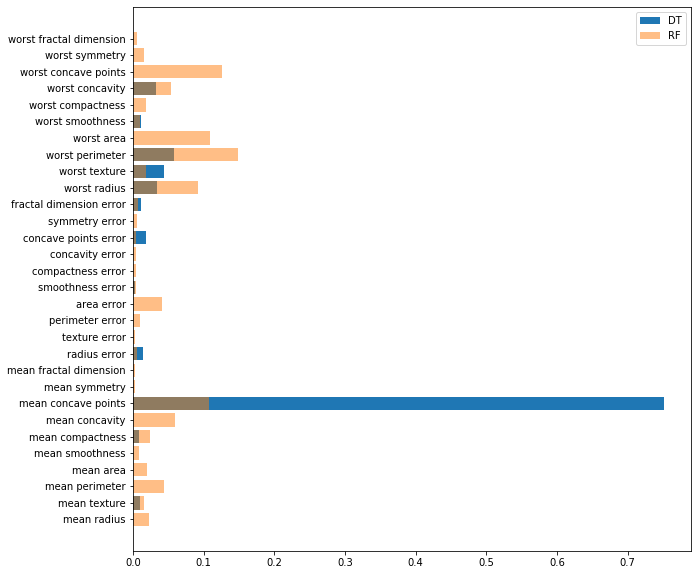

In [63]:
plt.figure(figsize=(10, 10))
n_features = len(grid_4.best_estimator_.named_steps['classifier'].feature_importances_)
plt.barh(range(n_features), grid_4.best_estimator_.named_steps['classifier'].feature_importances_, align='center', label="DT")

plt.barh(range(n_features), grid_5.best_estimator_.named_steps['classifier'].feature_importances_, align='center', alpha =0.5, label="RF")
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.legend()
plt.show()